In [1]:
import openrtdynamics2.lang as dy
import openrtdynamics2.targets as tg
from openrtdynamics2.manifest_import import show_inputs, show_outputs

# Code generation for a Simulink S-function

In [2]:
dy.clear()

system = dy.enter_system()

# define system inputs
delta           = dy.system_input( dy.DataTypeFloat64(1), name='delta',     title="steering angle")
v               = dy.system_input( dy.DataTypeFloat64(1), name='v',         title="velocity")
wheelbase       = dy.system_input( dy.DataTypeFloat64(1), name='wheelbase', title="wheelbase")

Ts = 0.01

x   = dy.signal()
y   = dy.signal()
psi = dy.signal()

# bicycle model
x_dot   = v * dy.cos( delta + psi )
y_dot   = v * dy.sin( delta + psi )
psi_dot = v / dy.float64(wheelbase) * dy.sin( delta )

# integrators
x    << dy.euler_integrator(x_dot,   Ts, 0)
y    << dy.euler_integrator(y_dot,   Ts, 0)
psi  << dy.euler_integrator(psi_dot, Ts, 0)

    
# define output(s)
dy.append_output(x, 'x')
dy.append_output(y, 'y')
dy.append_output(psi, 'psi')
dy.append_output(psi_dot, 'psi_dot')

# generate code using the s-function target
code_gen_results = dy.generate_code(template=tg.TargetCppSimulinkSFunction(sfun_name='kinematic_vehicle'), folder='.')

compiling system simulation (level 0)... 
Generated code will be written to . .
writing file ./simulation_manifest.json
writing file ./kinematic_vehicle.cpp
writing file ./kinematic_vehicle_block_mask_commands.m


# Integration into Simulink

The generated code can be compiled and integrated into Simulink by calling

    mex kinematic_vehicle.cpp
   
from the Matlab command line. Then, the code can be used by the S-function block in Simulink as illustrated below.

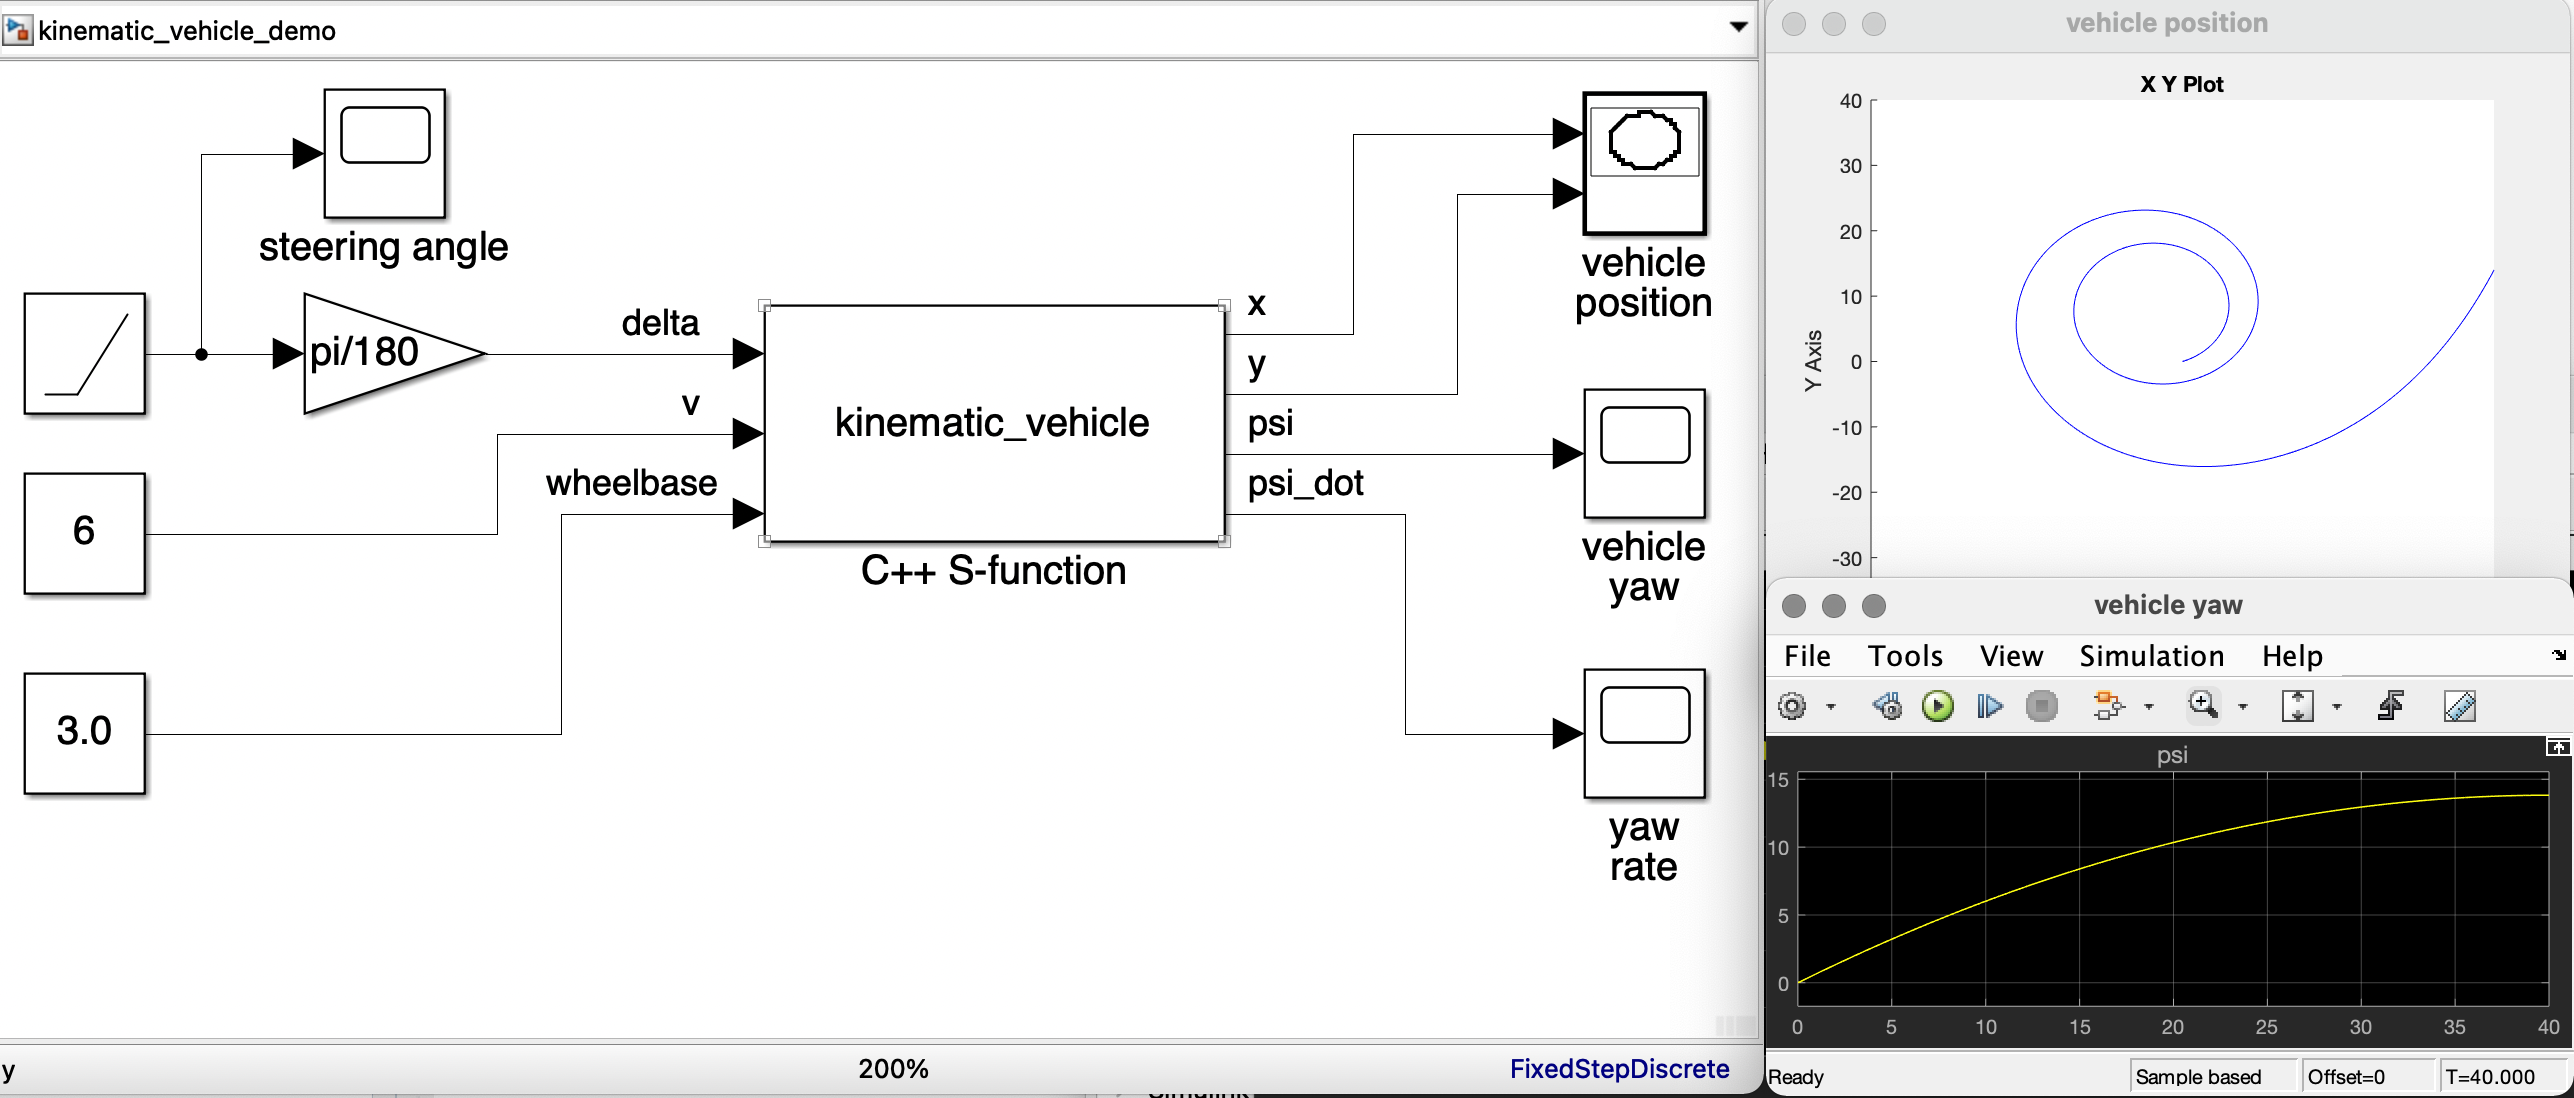


In [3]:
show_inputs( code_gen_results['manifest'] )

+-------+-----------------------+---------+--------+-------+----------------+----------------+
| #port | input signal,  to --> | outputs | update | reset | datatype (c++) | description    |
+-------+-----------------------+---------+--------+-------+----------------+----------------+
|   0   |         delta         |    X    |   X    |       |     double     | steering angle |
|   1   |           v           |    X    |   X    |       |     double     | velocity       |
|   2   |       wheelbase       |    X    |        |       |     double     | wheelbase      |
+-------+-----------------------+---------+--------+-------+----------------+----------------+


In [4]:
show_outputs(code_gen_results['manifest'] )

+-------+--------------+----------------+
| #port | input signal | datatype (c++) |
+-------+--------------+----------------+
|   0   |      x       |     double     |
|   1   |      y       |     double     |
|   2   |     psi      |     double     |
|   3   |   psi_dot    |     double     |
+-------+--------------+----------------+
